# Tugas Besar IF2220 Probabilitas dan Statistika
## Penarikan Kesimpulan dan Pengujian Hipotesis
- 13520006 - Vionie Novencia Thanggestyo
- 13520069 - Kent Liusudarso

Enam Langkah Testing:

1. Tentukan Hipotesis nol ${(H_0: θ = θ_0)}$, dimana ${θ}$ bisa berupa ${μ}$, ${σ^2}$, ${p}$, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari ${θ > θ_0}$, ${θ < θ_0}$, atau ${θ ≠ θ_0}$.
3. Tentukan tingkat signifikan ${α}$.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung _p-value_ sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK ${H_0}$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK ${H_0}$ jika _p-value_ lebih kecil dibanding tingkat signifikansi ${α}$ yang diinginkan.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

coloumn_names = ['id', 'pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'OrganicCarbon', 'Trihalomethanes', 'Turbidity', 'Potability']
df = pd.read_csv('water_potability.csv', names=coloumn_names)
df

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


### Soal 1
Menulis deskripsi statistika (*Descriptive Statistics*) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [2]:
df1 = df.describe(include=[np.number])
# df1.loc['mean'] = df.mean()
# df1.loc['modus'] = df.mode("")[0]
# df1.loc['standar deviasi'] = df.std()
df1.loc['variansi'] = df.var()
df1.loc['range'] = df.max() - df.min()
# df1.loc['nilai minimum'] = df.min()
# df1.loc['nilai maksimum'] = df.max()
# df1.loc['kuartil bawah'] = df.quantile(0.25)
# df1.loc['kuartil tengah'] = df.quantile(0.5)
# df1.loc['kuartil atas'] = df.quantile(0.75)
df1.loc['IQR'] = df.quantile(0.75) - df.quantile(0.25)
df1.loc['skewness'] = df.skew()
df1.loc['kurtosis'] = df.kurt()
df1

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
count,2010.00000,2010.000000,2010.000000,2.010000e+03,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,1005.50000,7.087193,195.969209,2.190467e+04,7.134322,333.211376,426.476708,14.357940,66.400717,3.969497,0.402985
std,580.38134,1.572803,32.643166,8.625398e+03,1.585214,41.211111,80.701872,3.325770,16.081109,0.780471,0.490620
min,1.00000,0.227499,73.492234,3.209426e+02,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,503.25000,6.090785,176.740657,1.561441e+04,6.138326,307.626986,366.619219,12.122530,55.949993,3.442882,0.000000
50%,1005.50000,7.029490,197.203525,2.092688e+04,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.000000
75%,1507.75000,8.053006,216.447589,2.717053e+04,8.109933,359.268147,482.209772,16.683562,77.294613,4.514663,1.000000
max,2010.00000,14.000000,317.338124,5.648867e+04,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000
variansi,336842.50000,2.473709,1065.576277,7.439749e+07,2.512904,1698.355672,6512.792113,11.060746,258.602066,0.609135,0.240708
range,2009.00000,13.772501,243.845890,5.616773e+04,11.736129,352.030642,551.722883,24.806707,115.422987,5.044749,1.000000


### Soal 2
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

### Soal 3
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

In [3]:
from scipy.stats import normaltest

D’Agostino’s K-squared test check’s normality of a variable based on skewness and kurtosis. It was named by Ralph D’Agostino.
- Skewness is a measure of symmetry.
- Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

<AxesSubplot:xlabel='id', ylabel='Count'>

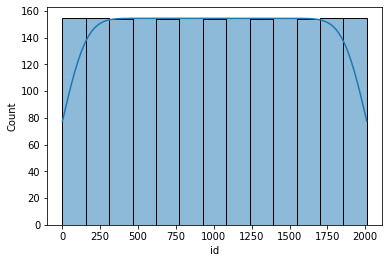

In [4]:
sns.histplot(df["id"], kde=True)

In [5]:
stat, p = normaltest(df["id"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=1615.941, p=0.000
Tidak Berdistribusi Normal


<AxesSubplot:xlabel='pH', ylabel='Count'>

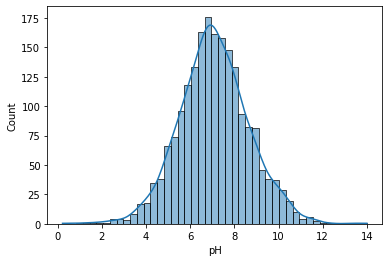

In [6]:
sns.histplot(df["pH"], kde=True)

In [7]:
stat, p = normaltest(df["pH"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')


stat=21.076, p=0.000
Tidak Berdistribusi Normal


<AxesSubplot:xlabel='Hardness', ylabel='Count'>

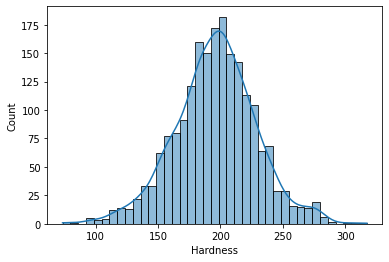

In [8]:
sns.histplot(df["Hardness"], kde=True)

In [9]:
stat, p = normaltest(df["pH"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=21.076, p=0.000
Tidak Berdistribusi Normal


<AxesSubplot:xlabel='Solids', ylabel='Count'>

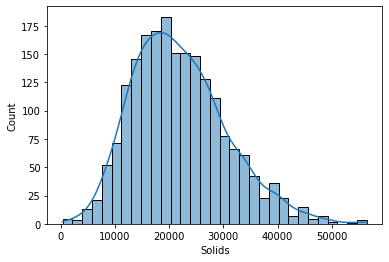

In [10]:
sns.histplot(df["Solids"], kde=True)

In [11]:
stat, p = normaltest(df["Solids"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=109.060, p=0.000
Tidak Berdistribusi Normal


<AxesSubplot:xlabel='Chloramines', ylabel='Count'>

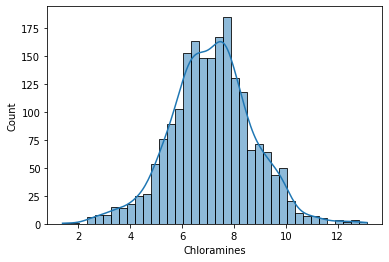

In [12]:
sns.histplot(df["Chloramines"], kde=True)

In [13]:
stat, p = normaltest(df["Chloramines"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=16.584, p=0.000
Tidak Berdistribusi Normal


<AxesSubplot:xlabel='Sulfate', ylabel='Count'>

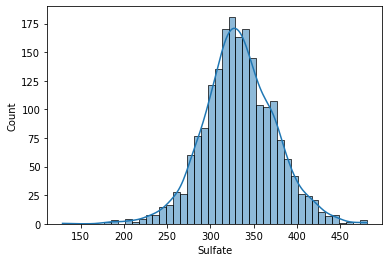

In [14]:
sns.histplot(df["Sulfate"], kde=True)

In [15]:
stat, p = normaltest(df["Sulfate"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=29.261, p=0.000
Tidak Berdistribusi Normal


<AxesSubplot:xlabel='Conductivity', ylabel='Count'>

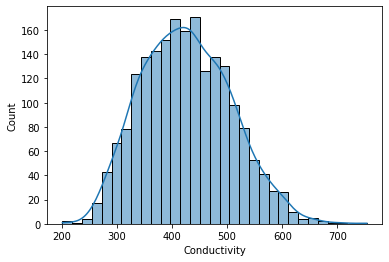

In [16]:
sns.histplot(df["Conductivity"], kde=True)

In [17]:
stat, p = normaltest(df["Conductivity"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=29.277, p=0.000
Tidak Berdistribusi Normal


<AxesSubplot:xlabel='OrganicCarbon', ylabel='Count'>

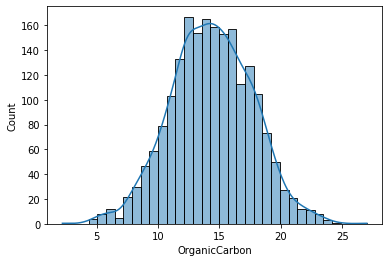

In [18]:
sns.histplot(df["OrganicCarbon"], kde=True)

In [19]:
stat, p = normaltest(df["OrganicCarbon"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=0.250, p=0.883
Berdistribusi Normal


<AxesSubplot:xlabel='Trihalomethanes', ylabel='Count'>

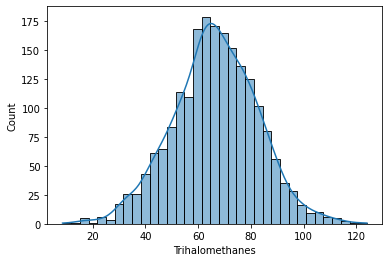

In [20]:
sns.histplot(df["Trihalomethanes"], kde=True)

In [21]:
stat, p = normaltest(df["Trihalomethanes"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=4.520, p=0.104
Berdistribusi Normal


<AxesSubplot:xlabel='Turbidity', ylabel='Count'>

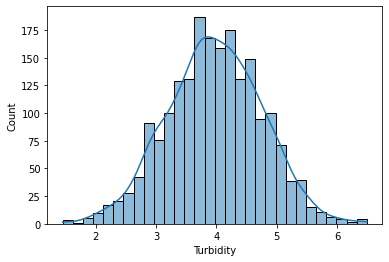

In [22]:
sns.histplot(df["Turbidity"], kde=True)

In [23]:
stat, p = normaltest(df["Turbidity"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=0.524, p=0.769
Berdistribusi Normal


<AxesSubplot:xlabel='Potability', ylabel='Count'>

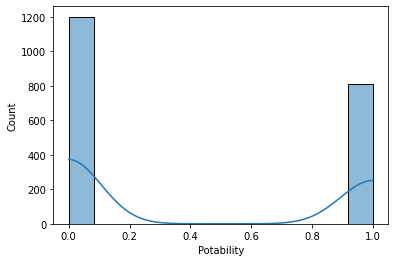

In [24]:
sns.histplot(df["Potability"], kde=True)

In [25]:
stat, p = normaltest(df["Potability"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Berdistribusi Normal')
else:
    print('Tidak Berdistribusi Normal')

stat=8042.892, p=0.000
Tidak Berdistribusi Normal


### Soal 4
Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.
- a. Nilai Rata-rata pH di atas 7?
- b. Nilai Rata-rata Hardness tidak sama dengan 205?
- c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?
- d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?
- e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

### Soal 5
Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.
- a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
- b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?
- c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?
- d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?
- e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

### Soal 6
Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.